In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 导入四分类原始文件，处理缺失值、并将特征标准化

In [3]:
df = pd.read_csv('data_for_ML_R.csv')
df.head()

,BSMJ,MMINS,LMINS,SMINS,DISCLIMA,TEACHSUP,DIRINS,PERFEED,STIMREAD,TEACHINT,...,MASTGOAL,BELONG,PVREAD,PVMATH,PVSCIE,LREAD,LMATH,LSCIE,ESCSlabel,label
0,72.83,320,360,640,1.4424,0.1694,1.1049,0.6398,0.9261,0.1744,...,1.8524,0.6818,629.74,681.15,671.56,5,6,5,ad,AOS
1,73.71,280,280,320,2.0345,1.3140,1.8202,0.7743,2.0871,1.8245,...,-0.4347,0.9683,435.04,499.38,503.84,2,3,3,ad,AFS
2,88.70,200,200,160,0.6019,1.3140,-0.2540,-0.3253,0.5102,-0.6079,...,0.3468,-0.4415,471.34,500.10,548.32,2,3,3,ad,AFS
3,79.05,200,200,440,-0.0424,0.7628,0.0836,-0.3253,-0.6200,0.1744,...,0.0217,-0.5635,660.92,695.82,700.35,5,6,5,ad,AOS
4,70.10,360,320,440,2.0345,0.7015,1.8202,2.0165,1.4882,0.1744,...,0.9703,2.7249,632.99,612.32,657.62,5,5,5,ad,AOS


In [4]:
#将99、999等异常值替换为缺失值并用均值填充缺失值
def f(item):
    if item in [99,999,99999999]:
        item = np.nan
        return item
    else:
        return item

df=df.applymap(f)
#df.head(20)
df.tail(20)

,BSMJ,MMINS,LMINS,SMINS,DISCLIMA,TEACHSUP,DIRINS,PERFEED,STIMREAD,TEACHINT,...,MASTGOAL,BELONG,PVREAD,PVMATH,PVSCIE,LREAD,LMATH,LSCIE,ESCSlabel,label
3011,86.72,225.0,225.0,450.0,0.2621,0.1597,-0.5794,-0.3253,-0.0073,-0.2934,...,-0.0940,-0.0358,708.57,747.91,767.56,6,6,6,ad,AOS
3012,79.74,200.0,200.0,440.0,0.8710,0.3850,0.7198,0.2012,1.0419,0.5667,...,-0.3152,0.6818,666.50,678.15,694.34,5,6,5,ad,AOS
3013,86.72,200.0,200.0,440.0,2.0345,0.1597,1.0055,-1.6391,0.5102,0.2598,...,-0.3152,-0.6659,684.25,681.09,692.47,5,6,5,ad,AOS
3014,88.70,200.0,200.0,440.0,1.1945,0.4394,0.0054,-0.3253,0.7586,0.7010,...,0.3468,-0.6843,694.89,714.59,731.14,5,6,6,ad,AOS
3015,75.54,200.0,200.0,440.0,1.3671,-0.9422,-0.5066,-0.6555,0.4764,0.1744,...,-0.4347,-0.4450,640.50,650.71,655.36,5,5,5,disad,DRS
3016,80.46,200.0,200.0,360.0,2.0345,0.4522,1.8202,0.7743,2.0871,1.8245,...,-0.3152,0.3581,724.30,685.40,708.36,6,6,6,ad,AOS
3017,76.65,200.0,200.0,440.0,0.3529,-0.2023,0.2336,-0.6555,0.5102,-0.3449,...,-0.3152,0.1650,728.32,718.66,729.57,6,6,6,ad,AOS
3018,82.41,200.0,200.0,440.0,0.6270,-0.5575,-0.2546,-0.3253,-0.3644,0.1744,...,0.1447,-0.5707,705.33,710.09,743.99,6,6,6,ad,AOS
3019,75.54,225.0,225.0,450.0,1.3671,0.2485,-0.0418,-0.6555,0.5102,0.1744,...,-1.4972,-0.4415,705.00,707.87,720.59,6,6,6,ad,AOS
3020,NaN,225.0,225.0,180.0,2.0345,1.3140,1.8202,2.0165,2.0871,1.8245,...,-0.8444,-0.0553,670.04,690.35,723.12,5,6,6,ad,AOS


In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_num = df.drop(['PVREAD','PVMATH','PVSCIE','LREAD','LMATH','LSCIE','ESCSlabel','label'], axis=1)
imputer.fit(df_num)
X = imputer.transform(df_num)
dfX = pd.DataFrame(X, columns=df_num.columns)
dfX.tail(20)

,BSMJ,MMINS,LMINS,SMINS,DISCLIMA,TEACHSUP,DIRINS,PERFEED,STIMREAD,TEACHINT,...,PERCOMP,PERCOOP,ATTLNACT,COMPETE,WORKMAST,GFOFAIL,EUDMO,SWBP,MASTGOAL,BELONG
3011,86.720000,225.000000,225.000000,450.000000,0.2621,0.1597,-0.579400,-0.325300,-0.007300,-0.293400,...,0.28650,0.60120,-0.658300,0.631400,-0.654500,-0.434200,-0.672300,-1.566000,-0.094000,-0.035800
3012,79.740000,200.000000,200.000000,440.000000,0.8710,0.3850,0.719800,0.201200,1.041900,0.566700,...,0.28650,1.32560,-0.658300,0.195600,1.144800,-0.379900,-0.569000,1.238600,-0.315200,0.681800
3013,86.720000,200.000000,200.000000,440.000000,2.0345,0.1597,1.005500,-1.639100,0.510200,0.259800,...,0.28650,-0.42130,0.466700,0.195600,-0.101500,0.463700,-0.312100,-0.592800,-0.315200,-0.665900
3014,88.700000,200.000000,200.000000,440.000000,1.1945,0.4394,0.005400,-0.325300,0.758600,0.701000,...,0.28650,-0.18550,-1.153400,-0.266100,0.027300,0.463700,-0.982700,-1.117600,0.346800,-0.684300
3015,75.540000,200.000000,200.000000,440.000000,1.3671,-0.9422,-0.506600,-0.655500,0.476400,0.174400,...,0.69120,0.60120,0.008300,-0.266100,-0.101500,0.820700,-0.569000,-1.117600,-0.434700,-0.445000
3016,80.460000,200.000000,200.000000,360.000000,2.0345,0.4522,1.820200,0.774300,2.087100,1.824500,...,1.47340,-0.93910,0.466700,-0.266100,1.816400,-0.687000,0.812600,-0.592800,-0.315200,0.358100
3017,76.650000,200.000000,200.000000,440.000000,0.3529,-0.2023,0.233600,-0.655500,0.510200,-0.344900,...,0.28650,0.60120,-0.658300,0.195600,-0.101500,-0.434200,-0.982700,1.238600,-0.315200,0.165000
3018,82.410000,200.000000,200.000000,440.000000,0.6270,-0.5575,-0.254600,-0.325300,-0.364400,0.174400,...,1.47340,0.60120,0.028100,-0.570700,-0.654500,0.463700,-0.982700,-0.592800,0.144700,-0.570700
3019,75.540000,225.000000,225.000000,450.000000,1.3671,0.2485,-0.041800,-0.655500,0.510200,0.174400,...,1.21860,-2.14280,-0.658300,-0.204700,-0.654500,-0.434200,-0.982700,-1.117600,-1.497200,-0.441500
3020,68.955307,225.000000,225.000000,180.000000,2.0345,1.3140,1.820200,2.016500,2.087100,1.824500,...,2.03780,1.67620,1.084400,2.005400,1.816400,-0.245900,1.741100,-1.256800,-0.844400,-0.055300


In [9]:
#特征的标准化处理(z分数)
from sklearn.preprocessing import StandardScaler

dfX = StandardScaler().fit_transform(dfX)
dfX = pd.DataFrame(dfX, columns=df_num.columns)
dfX.tail(20)

,BSMJ,MMINS,LMINS,SMINS,DISCLIMA,TEACHSUP,DIRINS,PERFEED,STIMREAD,TEACHINT,...,PERCOMP,PERCOOP,ATTLNACT,COMPETE,WORKMAST,GFOFAIL,EUDMO,SWBP,MASTGOAL,BELONG
3011,1.147189,-0.399043,-0.269795,6.089470e-01,-0.624562,-0.303785,-1.039280,-0.713107,-0.674292,-7.844756e-01,...,6.543110e-02,0.327065,-9.037736e-01,0.240971,-1.103176,-4.769570e-01,-0.803955,-1.852872,-1.900814e-01,9.369275e-02
3012,0.696442,-0.640856,-0.500588,5.575242e-01,-0.034843,-0.047313,0.245425,-0.193622,0.319698,9.773723e-02,...,6.543110e-02,1.061993,-9.037736e-01,-0.285239,0.914992,-4.151280e-01,-0.693004,1.327970,-4.292087e-01,8.678993e-01
3013,1.147189,-0.640856,-0.500588,5.575242e-01,1.092007,-0.303785,0.527938,-2.009402,-0.184023,-2.170531e-01,...,6.543110e-02,-0.710294,3.106719e-01,-0.285239,-0.482908,5.454418e-01,-0.417074,-0.749115,-4.292087e-01,-5.861115e-01
3014,1.275052,-0.640856,-0.500588,5.575242e-01,0.278467,0.014614,-0.461005,-0.713107,0.051305,2.354900e-01,...,6.543110e-02,-0.471067,-1.438238e+00,-0.842722,-0.338441,5.454418e-01,-1.137347,-1.344318,2.864436e-01,-6.059630e-01
3015,0.425219,-0.640856,-0.500588,5.575242e-01,0.445630,-1.558147,-0.967293,-1.038907,-0.216045,-3.046487e-01,...,4.852152e-01,0.327065,-1.841741e-01,-0.842722,-0.482908,9.519418e-01,-0.693004,-1.344318,-5.583936e-01,-3.477862e-01
3016,0.742938,-0.640856,-0.500588,1.461411e-01,1.092007,0.029185,1.333549,0.371842,1.309898,1.387875e+00,...,1.296570e+00,-1.235619,3.106719e-01,-0.842722,1.668286,-7.648091e-01,0.790935,-0.749115,-4.292087e-01,5.186648e-01
3017,0.496900,-0.640856,-0.500588,5.575242e-01,-0.536623,-0.715873,-0.235350,-1.038907,-0.184023,-8.372997e-01,...,6.543110e-02,0.327065,-9.037736e-01,-0.285239,-0.482908,-4.769570e-01,-1.137347,1.327970,-4.292087e-01,3.103325e-01
3018,0.868863,-0.640856,-0.500588,5.575242e-01,-0.271157,-1.120219,-0.718104,-0.713107,-1.012601,-3.046487e-01,...,1.296570e+00,0.327065,-1.627999e-01,-1.210514,-1.103176,5.454418e-01,-1.137347,-0.749115,6.796424e-02,-4.834018e-01
3019,0.425219,-0.399043,-0.269795,6.089470e-01,0.445630,-0.202699,-0.507678,-1.038907,-0.184023,-3.046487e-01,...,1.032273e+00,-2.456812,-9.037736e-01,-0.768584,-1.103176,-4.769570e-01,-1.137347,-1.344318,-1.707005e+00,-3.440101e-01
3020,0.000000,-0.399043,-0.269795,-7.794707e-01,1.092007,1.010226,1.333549,1.597491,1.309898,1.387875e+00,...,1.882006e+00,1.417688,9.774835e-01,1.900017,1.668286,-2.625482e-01,1.788211,-1.502192,-1.001298e+00,7.265453e-02


In [10]:
#将上述数据集与标签合并
dfY = df['label']
data = dfX.join(dfY)
data.head()

,BSMJ,MMINS,LMINS,SMINS,DISCLIMA,TEACHSUP,DIRINS,PERFEED,STIMREAD,TEACHINT,...,PERCOOP,ATTLNACT,COMPETE,WORKMAST,GFOFAIL,EUDMO,SWBP,MASTGOAL,BELONG,label
0,0.250216,0.519845,0.976484,1.585982,0.518558,-0.292743,0.626229,0.239134,0.209991,-0.304649,...,1.417688,0.977484,0.240971,0.914992,2.170075,0.199658,1.327970,1.914066,0.867899,AOS
1,0.307043,0.132945,0.237948,-0.059550,1.092007,1.010226,1.333549,0.371842,1.309898,1.387875,...,0.731154,0.977484,1.900017,1.668286,-0.415128,1.788211,0.660635,-0.558394,1.176999,AFS
2,1.275052,-0.640856,-0.500588,-0.882316,-0.295466,1.010226,-0.717511,-0.713107,-0.184023,-1.107061,...,0.327065,-0.903774,-0.285239,-0.482908,0.076657,-0.803955,0.135183,0.286444,-0.344010,AFS
3,0.651884,-0.640856,-0.500588,0.557524,-0.919471,0.382761,-0.383677,-0.713107,-1.254751,-0.304649,...,-0.497851,-2.932383,0.168040,-0.482908,2.170075,-1.137347,-0.749115,-0.065004,-0.475634,AOS
4,0.073921,0.906745,0.607216,0.557524,1.092007,0.312979,1.333549,1.597491,0.742513,-0.304649,...,0.731154,0.977484,0.904710,0.336562,1.263592,1.788211,0.751254,0.960476,3.072165,AOS


### 建立四个副本，创建四个二分类模型数据文件

In [11]:
data_DRS_DNRS = data.copy()
data_AOS_AFS = data.copy()
data_DRS_AOS = data.copy()
data_DNRS_AFS = data.copy()

In [14]:
data_DRS_DNRS = data_DRS_DNRS.drop(data_DRS_DNRS[(data_DRS_DNRS.label=='AOS')].index.tolist()).drop(data_DRS_DNRS[(data_DRS_DNRS.label=='AFS')].index.tolist())
data_AOS_AFS = data_AOS_AFS.drop(data_AOS_AFS[(data_AOS_AFS.label=='DRS')].index.tolist()).drop(data_AOS_AFS[(data_AOS_AFS.label=='DNRS')].index.tolist())
data_DRS_AOS = data_DRS_AOS.drop(data_DRS_AOS[(data_DRS_AOS.label=='DNRS')].index.tolist()).drop(data_DRS_AOS[(data_DRS_AOS.label=='AFS')].index.tolist())
data_DNRS_AFS = data_DNRS_AFS.drop(data_DNRS_AFS[(data_DNRS_AFS.label=='AOS')].index.tolist()).drop(data_DNRS_AFS[(data_DNRS_AFS.label=='DRS')].index.tolist())

In [15]:
data_DRS_DNRS.to_csv('DRS_DNRS.csv')
data_AOS_AFS.to_csv('AOS_AFS.csv')
data_DRS_AOS.to_csv('DRS_AOS.csv')
data_DNRS_AFS.to_csv('DNRS_AFS.csv')

#### 使用SPSS将标签编码为0、1，后导入

In [16]:
df_DRS_DNRS = pd.read_csv('DRS_DNRS.csv')
df_AOS_AFS = pd.read_csv('AOS_AFS.csv')
df_DRS_AOS = pd.read_csv('DRS_AOS.csv')
df_DNRS_AFS = pd.read_csv('DNRS_AFS.csv')
df_DRS_DNRS.head()

,BSMJ,MMINS,LMINS,SMINS,DISCLIMA,TEACHSUP,DIRINS,PERFEED,STIMREAD,TEACHINT,...,ATTLNACT,COMPETE,WORKMAST,GFOFAIL,EUDMO,SWBP,MASTGOAL,BELONG,label,label_num
0,0.496900,-0.399043,-0.685222,-1.705083,0.170673,-0.937625,-0.431636,-0.320311,0.316287,-0.217361,...,-0.903774,0.428972,-0.482908,-0.476957,-0.803955,0.135183,0.286444,-0.211200,DRS,1
1,-0.004863,-0.640856,-0.500588,-1.705083,-0.919471,-1.792535,-1.552886,-0.713107,-1.254751,-0.304649,...,-0.903774,-0.285239,-1.103176,0.545442,0.199658,-0.749115,-1.707005,-0.933512,DNRS,0
2,0.939252,-1.269568,-0.685222,0.608947,-1.376990,1.010226,1.333549,-0.713107,-1.254751,-0.105661,...,-1.452271,-1.703760,-1.904812,-0.764809,-1.137347,0.135183,-1.511335,-0.497643,DNRS,0
3,0.696442,-1.269568,-0.685222,0.608947,-0.674246,-1.120219,0.014333,-1.368951,-0.983327,-1.141423,...,-0.184174,-0.073572,0.177177,0.076657,-1.137347,1.327970,-0.429209,-0.211200,DRS,1
4,-0.657736,-0.834306,-0.685222,-1.705083,-2.168157,-0.175151,-1.290249,-2.009402,-0.888684,-1.107061,...,-0.903774,-0.285239,-1.103176,2.170075,0.199658,-1.425183,-0.190081,-1.277352,DNRS,0


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score,roc_curve, roc_auc_score

In [19]:
#绘制ROC曲线的函数
def plot_roc_curve(fpr,tpr,label=None,color='blue'):
    plt.plot(fpr,tpr,linewidth=2,label=label,color=color)
    plt.plot([0,1],[0,1],'k--')#对角线
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')

#### 将四个文件分别拆分为训练集和测试集

In [22]:
from sklearn.model_selection import train_test_split
#DRS_DNRS
train_DRS_DNRS, test_DRS_DNRS = train_test_split(df_DRS_DNRS, test_size=0.2, random_state=42)
trainx_DRS_DNRS= train_DRS_DNRS.drop(columns=['label_num','label'])
trainy_DRS_DNRS = train_DRS_DNRS['label_num']
testx_DRS_DNRS = test_DRS_DNRS.drop(columns=['label_num','label'])
testy_DRS_DNRS = test_DRS_DNRS['label_num']

In [23]:
trainx_DRS_DNRS.head()

,BSMJ,MMINS,LMINS,SMINS,DISCLIMA,TEACHSUP,DIRINS,PERFEED,STIMREAD,TEACHINT,...,PERCOMP,PERCOOP,ATTLNACT,COMPETE,WORKMAST,GFOFAIL,EUDMO,SWBP,MASTGOAL,BELONG
708,1.275052,2.260895,0.884167,0.094718,1.092007,1.010226,0.245425,0.113136,1.309898,0.509765,...,-0.276350,0.327065,0.977484,0.240971,-0.482908,0.545442,-0.259293,0.135183,-0.772873,-0.445965
239,0.000000,0.132945,-0.131320,-0.470933,-0.034843,-1.268547,-0.317128,-1.038907,-0.983327,-0.304649,...,-0.868840,-1.235619,-0.162800,0.240971,0.177177,-0.476957,0.199658,-1.344318,-0.521314,-0.786029
381,0.000000,-0.253955,-0.500588,-1.088008,-0.118812,-2.031819,0.527938,-2.009402,-1.254751,-1.330974,...,-0.868840,-1.235619,-0.903774,-0.285239,-0.482908,0.545442,0.199658,-0.749115,-1.001298,-1.361936
792,-0.834677,0.906745,1.391910,0.146141,-0.118812,1.010226,-1.011889,0.113136,-1.396384,-0.694931,...,0.767768,1.417688,-0.903774,-0.285239,-0.482908,-0.764809,-0.803955,-0.749115,-1.511335,-0.211200
672,-2.868850,1.293645,0.607216,-0.676625,-0.248978,-1.155622,0.626229,0.113136,-0.980200,-1.141423,...,-2.295090,-2.456812,-0.188600,-0.285239,-3.438431,-0.764809,0.199658,-1.115673,-1.388637,0.661940


In [24]:
#AOS_AFS
train_AOS_AFS, test_AOS_AFS = train_test_split(df_AOS_AFS, test_size=0.2, random_state=42)
trainx_AOS_AFS= train_AOS_AFS.drop(columns=['label_num','label'])
trainy_AOS_AFS = train_AOS_AFS['label_num']
testx_AOS_AFS = test_AOS_AFS.drop(columns=['label_num','label'])
testy_AOS_AFS = test_AOS_AFS['label_num']

In [25]:
#DRS_AOS
train_DRS_AOS, test_DRS_AOS = train_test_split(df_DRS_AOS, test_size=0.2, random_state=42)
trainx_DRS_AOS= train_DRS_AOS.drop(columns=['label_num','label'])
trainy_DRS_AOS = train_DRS_AOS['label_num']
testx_DRS_AOS= test_DRS_AOS.drop(columns=['label_num','label'])
testy_DRS_AOS= test_DRS_AOS['label_num']

In [26]:
#DNRS_AFS
train_DNRS_AFS, test_DNRS_AFS = train_test_split(df_DNRS_AFS, test_size=0.2, random_state=42)
trainx_DNRS_AFS= train_DNRS_AFS.drop(columns=['label_num','label'])
trainy_DNRS_AFS = train_DNRS_AFS['label_num']
testx_DNRS_AFS= test_DNRS_AFS.drop(columns=['label_num','label'])
testy_DNRS_AFS= test_DNRS_AFS['label_num']

#### 建模

准确率为 0.8539325842696629
精度为 0.8
召回率为 0.36363636363636365
F1值为 0.5000000000000001


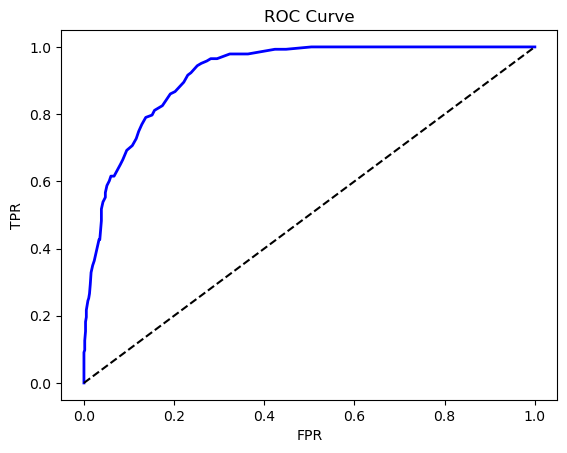

AUC值为 0.9203731242395566


In [28]:
#DRS_DNRS
rf_clf = RandomForestClassifier(n_jobs=-1, random_state=42)#先使用默认超参看看模型效果，再调参
rf_clf.fit(trainx_DRS_DNRS,trainy_DRS_DNRS)
#模型评估
trainy_DRS_DNRS_rf_pred = cross_val_predict(rf_clf,trainx_DRS_DNRS,trainy_DRS_DNRS,cv=4)
trainy_DRS_DNRS_rf_prob = cross_val_predict(rf_clf,trainx_DRS_DNRS,trainy_DRS_DNRS,cv=4,method='predict_proba')
trainy_DRS_DNRS_rf_score = trainy_DRS_DNRS_rf_prob[:,1]
print('准确率为',accuracy_score(trainy_DRS_DNRS,trainy_DRS_DNRS_rf_pred)) #准确率
print('精度为',precision_score(trainy_DRS_DNRS,trainy_DRS_DNRS_rf_pred)) #精度
print('召回率为',recall_score(trainy_DRS_DNRS,trainy_DRS_DNRS_rf_pred)) #召回率
print('F1值为',f1_score(trainy_DRS_DNRS,trainy_DRS_DNRS_rf_pred)) #F1值
fpr,tpr,thresholds = roc_curve(trainy_DRS_DNRS,trainy_DRS_DNRS_rf_score)#ROC曲线
plot_roc_curve(fpr,tpr)
plt.show()
print('AUC值为',roc_auc_score(trainy_DRS_DNRS,trainy_DRS_DNRS_rf_score))

由上述结果可知，精度高但召回率低。本研究希望模型能尽可能将弹性学生识别出来，所以需要更高的召回率。下面进行精度与召回率的权衡。

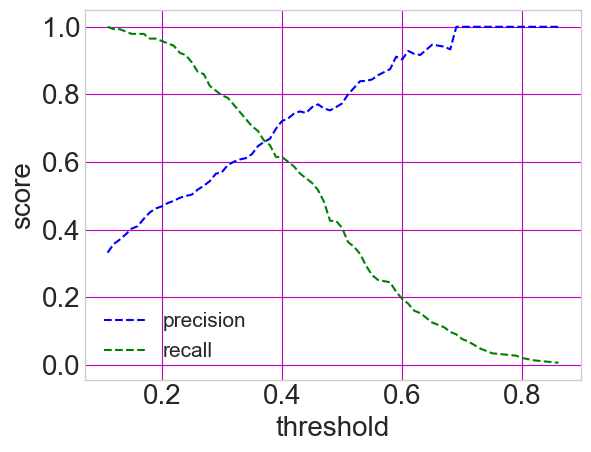

In [37]:
#y_scores = cross_val_predict(rf_clf, trainx_DRS_DNRS,trainy_DRS_DNRS,cv = 4, method='predict_proba')
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(trainy_DRS_DNRS,trainy_DRS_DNRS_rf_score)
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label='recall')
    plt.rcParams.update({'font.size': 15}) 
    plt.legend()
    plt.xlabel('threshold',fontsize=20)
    plt.ylabel('score',fontsize=20)
    plt.grid(color='m')
       
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [38]:
#由上图可知，召回率为0.8时精度在0.6左右，比较理想，因此将阈限设为得到该结果的值
threshold_80_recall = thresholds[np.argmax(recalls>=0.8)]
print(threshold_80_recall)

0.11


In [40]:
trainy_DRS_DNRS_rf_pred_80=(trainy_DRS_DNRS_rf_score>=0.3)
print('准确率为',accuracy_score(trainy_DRS_DNRS,trainy_DRS_DNRS_rf_pred_80)) 
print('精度为',precision_score(trainy_DRS_DNRS,trainy_DRS_DNRS_rf_pred_80)) 
print('召回率为',recall_score(trainy_DRS_DNRS,trainy_DRS_DNRS_rf_pred_80))
print('F1值为',f1_score(trainy_DRS_DNRS,trainy_DRS_DNRS_rf_pred_80)) 

准确率为 0.8384831460674157
精度为 0.57
召回率为 0.7972027972027972
F1值为 0.6647230320699709


In [60]:
#查看一下初始模型的特征重要性
for name, score in zip(trainx_DRS_DNRS.columns, rf_clf.feature_importances_):
    print(name, score)

BSMJ 0.06215535857978827
MMINS 0.032801797905596314
LMINS 0.041388329657268325
SMINS 0.121628356474261
DISCLIMA 0.04314087872880574
TEACHSUP 0.02828127921955656
DIRINS 0.03836134133162406
PERFEED 0.03578492724061631
STIMREAD 0.03935754088948398
TEACHINT 0.027551518287783947
JOYREAD 0.09040718309489983
SCREADCOMP 0.02508032903660548
SCREADDIFF 0.03225381245614911
PERCOMP 0.026832146217103694
PERCOOP 0.024689330026695003
ATTLNACT 0.024476789943962775
COMPETE 0.02422127902557871
WORKMAST 0.025732196063583356
GFOFAIL 0.030599206130030275
EUDMO 0.11352608986228403
SWBP 0.019624248174559444
MASTGOAL 0.05656008777944635
BELONG 0.035545973874317405


In [44]:
#调参
#以召回率作为调参的标准，由于超参较多，采用随机搜索法
from sklearn.model_selection import RandomizedSearchCV
n_estimator_range = np.arange(50,150,1)
max_features_range = np.arange(4,24,1)
max_depth_range = np.arange(15,24,1)
min_samples_split_range = np.arange(2,50,2)
min_samples_leaf_range = np.arange(2,50,2)
param_grid = {'n_estimators':n_estimator_range,
              'max_features':max_features_range,
              'max_depth':max_depth_range,
              'min_samples_split':min_samples_split_range,
              'min_samples_leaf':min_samples_leaf_range}

random_search = RandomizedSearchCV(rf_clf,param_grid,cv=4,scoring='recall',random_state=42)
random_search.fit(trainx_DRS_DNRS,trainy_DRS_DNRS)
print('最优组合为', random_search.best_params_)
print('得分为', random_search.best_score_)

最优组合为 {'n_estimators': 101, 'min_samples_split': 28, 'min_samples_leaf': 2, 'max_features': 19, 'max_depth': 23}
得分为 0.5248015873015873


准确率为 0.8637640449438202
精度为 0.7211538461538461
召回率为 0.5244755244755245
F1值为 0.6072874493927125


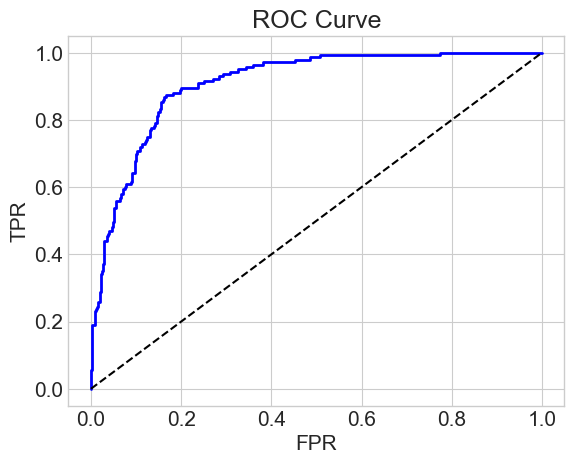

AUC值为 0.909902048742119


In [45]:
#使用最优超参组合重新训练模型
rf_clf_tuned = RandomForestClassifier(n_jobs=-1, random_state=42,n_estimators=101, min_samples_split=28, 
                                      min_samples_leaf=2, max_features=19, max_depth=23)
rf_clf_tuned.fit(trainx_DRS_DNRS,trainy_DRS_DNRS)
#模型评估
trainy_DRS_DNRS_rf_pred = cross_val_predict(rf_clf_tuned,trainx_DRS_DNRS,trainy_DRS_DNRS,cv=4)
trainy_DRS_DNRS_rf_prob = cross_val_predict(rf_clf_tuned,trainx_DRS_DNRS,trainy_DRS_DNRS,cv=4,method='predict_proba')
trainy_DRS_DNRS_rf_score = trainy_DRS_DNRS_rf_prob[:,1]
print('准确率为',accuracy_score(trainy_DRS_DNRS,trainy_DRS_DNRS_rf_pred))
print('精度为',precision_score(trainy_DRS_DNRS,trainy_DRS_DNRS_rf_pred))
print('召回率为',recall_score(trainy_DRS_DNRS,trainy_DRS_DNRS_rf_pred))
print('F1值为',f1_score(trainy_DRS_DNRS,trainy_DRS_DNRS_rf_pred))
fpr,tpr,thresholds = roc_curve(trainy_DRS_DNRS,trainy_DRS_DNRS_rf_score)
plot_roc_curve(fpr,tpr)
plt.show()
print('AUC值为',roc_auc_score(trainy_DRS_DNRS,trainy_DRS_DNRS_rf_score))

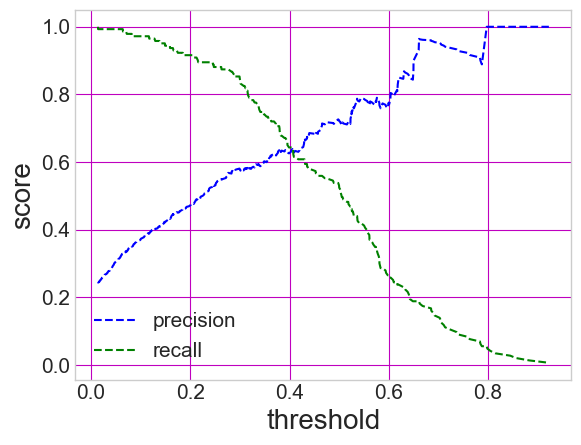

In [46]:
precisions,recalls,thresholds = precision_recall_curve(trainy_DRS_DNRS,trainy_DRS_DNRS_rf_score)
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label='recall')
    plt.rcParams.update({'font.size': 15}) 
    plt.legend()
    plt.xlabel('threshold',fontsize=20)
    plt.ylabel('score',fontsize=20)
    plt.grid(color='m')
       
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [51]:
trainy_DRS_DNRS_rf_pred_80=(trainy_DRS_DNRS_rf_score>=0.3)
print('准确率为',accuracy_score(trainy_DRS_DNRS,trainy_DRS_DNRS_rf_pred_80)) 
print('精度为',precision_score(trainy_DRS_DNRS,trainy_DRS_DNRS_rf_pred_80)) 
print('召回率为',recall_score(trainy_DRS_DNRS,trainy_DRS_DNRS_rf_pred_80))
print('F1值为',f1_score(trainy_DRS_DNRS,trainy_DRS_DNRS_rf_pred_80)) 

准确率为 0.8441011235955056
精度为 0.5769230769230769
召回率为 0.8391608391608392
F1值为 0.6837606837606838


In [61]:
#查看一下调整后模型的特征重要性
for name, score in zip(trainx_DRS_DNRS.columns, rf_clf_tuned.feature_importances_):
    print(name, score)

BSMJ 0.21319796937586247
MMINS 0.0164495683444682
LMINS 0.01393747862123873
SMINS 0.19476729969198114
DISCLIMA 0.025122344945685895
TEACHSUP 0.00433312944314408
DIRINS 0.026516184893595255
PERFEED 0.007647113929970702
STIMREAD 0.002188085150307408
TEACHINT 0.002503688714107024
JOYREAD 0.2581367254362787
SCREADCOMP 0.0
SCREADDIFF 0.018702316495941215
PERCOMP 0.00263958918932448
PERCOOP 0.003938536781899901
ATTLNACT 0.016184246699450386
COMPETE 0.005087868462503764
WORKMAST 0.006404661154325219
GFOFAIL 0.039245093219789605
EUDMO 0.09951626403258829
SWBP 0.006288074622918214
MASTGOAL 0.026814893266953875
BELONG 0.010378867527665377


准确率为 0.8033707865168539
精度为 0.6666666666666666
召回率为 0.10810810810810811
F1值为 0.18604651162790697


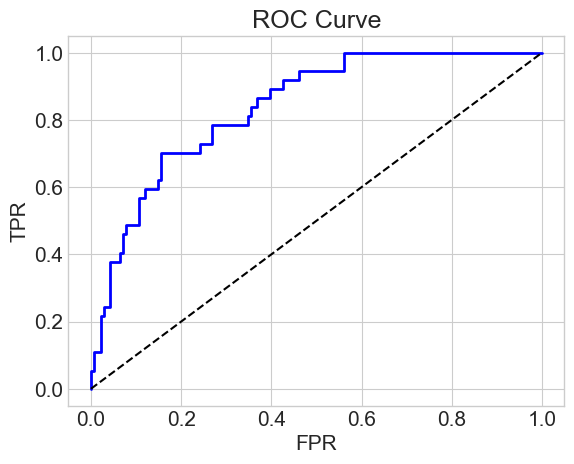

AUC值为 0.8395629672225418


In [53]:
#在测试集上测试模型性能
rf_clf_tuned.fit(testx_DRS_DNRS,testy_DRS_DNRS)
#模型评估
testy_DRS_DNRS_rf_pred = cross_val_predict(rf_clf_tuned,testx_DRS_DNRS,testy_DRS_DNRS,cv=4)
testy_DRS_DNRS_rf_prob = cross_val_predict(rf_clf_tuned,testx_DRS_DNRS,testy_DRS_DNRS,cv=4,method='predict_proba')
testy_DRS_DNRS_rf_score = testy_DRS_DNRS_rf_prob[:,1]
print('准确率为',accuracy_score(testy_DRS_DNRS,testy_DRS_DNRS_rf_pred))
print('精度为',precision_score(testy_DRS_DNRS,testy_DRS_DNRS_rf_pred))
print('召回率为',recall_score(testy_DRS_DNRS,testy_DRS_DNRS_rf_pred))
print('F1值为',f1_score(testy_DRS_DNRS,testy_DRS_DNRS_rf_pred))
fpr,tpr,thresholds = roc_curve(testy_DRS_DNRS,testy_DRS_DNRS_rf_score)
plot_roc_curve(fpr,tpr)
plt.show()
print('AUC值为',roc_auc_score(testy_DRS_DNRS,testy_DRS_DNRS_rf_score))

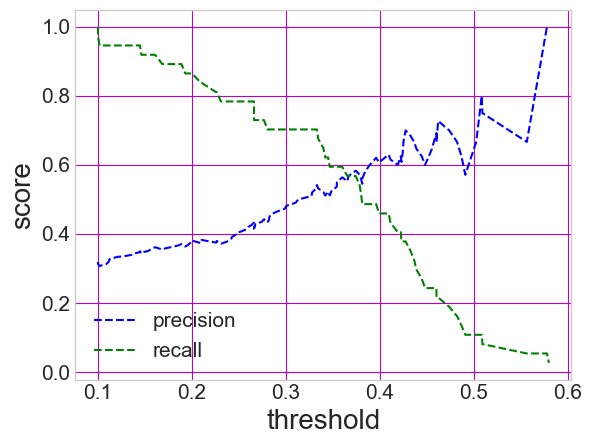

In [54]:
precisions,recalls,thresholds = precision_recall_curve(testy_DRS_DNRS,testy_DRS_DNRS_rf_score)

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [59]:
testy_DRS_DNRS_rf_pred_80=(testy_DRS_DNRS_rf_score>=0.22)
print('准确率为',accuracy_score(testy_DRS_DNRS,testy_DRS_DNRS_rf_pred_80)) 
print('精度为',precision_score(testy_DRS_DNRS,testy_DRS_DNRS_rf_pred_80)) 
print('召回率为',recall_score(testy_DRS_DNRS,testy_DRS_DNRS_rf_pred_80))
print('F1值为',f1_score(testy_DRS_DNRS,testy_DRS_DNRS_rf_pred_80)) 

准确率为 0.6797752808988764
精度为 0.375
召回率为 0.8108108108108109
F1值为 0.5128205128205128
